<a href="https://colab.research.google.com/github/Aayush2799/Mapping-the-Landscape-of-Generative-AI-Research-through-Web-of-Science/blob/main/Aayush_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project 3
## Mapping the Landscape of Generative AI Research through Web of Science

Steps involved in the Project:

1) Data Collection

2) Data and Keyword Preprocessing

3) Co-occurence network

4) Adjacency matrix

5) Insights


### 1) Data Collection

### Research papers of year 2023 were collected under Web Of Science from NU Library.

In [ ]:
# Connecting Google to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Changing the Location where my dataset is stored
%cd /content/drive/MyDrive/fda project 3/


/content/drive/MyDrive/fda project 3


In [ ]:
#importing necessary libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
#downloading necessary libraries
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 2) Data and Keyword Preprocessing.

In [ ]:
text= pd.read_csv('project_data.csv')

In [ ]:
text.head(7)

,AuthorKeywords,IDSNumber
0,Legal;Law;ExplainableAI;Blockchain;GenerativeA...,DZ9O6
1,AIgovernance;AIregulation;generativeAI;generat...,Z3KI4
2,GenerativeAI;innovationdiffusion;TOEframework,N8OS3
3,GenerativeAI;Telecom;6G;5G;Survey;Application,EP0Q2
4,GenerativeAI;Largelanguagemodels;Generativeadv...,T5PG5
5,GenerativeAI;ChatGPT;Pedagogicalagents;Socrati...,O5OH6
6,generativeAI;ChatGPT;legalregulation;ethicalpr...,AH2W0


### The below code utilized information from a dataset called data3 to populate the 'AuthorKeywords' column. Next, it divided every entry in this column into distinct elements by using the semicolon ({;}) as a delimiter. Then, in a new dataset, these divided pieces were organized into different columns.


In [ ]:
divide_columns = text['AuthorKeywords'].str.split(';', expand=True)

In [ ]:
divide_columns.head(7)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Legal,Law,ExplainableAI,Blockchain,GenerativeAI,ResponsibleAI,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,AIgovernance,AIregulation,generativeAI,generativemodels,inspectability,largelanguagemodels,modifiability,observability,regulatoryobjects,None,...,None,None,None,None,None,None,None,None,None,None
2,GenerativeAI,innovationdiffusion,TOEframework,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,GenerativeAI,Telecom,6G,5G,Survey,Application,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,GenerativeAI,Largelanguagemodels,Generativeadversarialnetworks,Harms,Power,Inequality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,GenerativeAI,ChatGPT,Pedagogicalagents,Socratictutors,Simulations,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,generativeAI,ChatGPT,legalregulation,ethicalprinciple,algorithm,dataprotection,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Converted all the words in the expanded keywords dataframe to lower case.

In [ ]:
lowerc_expanded_keywords = divide_columns.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [ ]:
lowerc_expanded_keywords.head(7)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,legal,law,explainableai,blockchain,generativeai,responsibleai,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,aigovernance,airegulation,generativeai,generativemodels,inspectability,largelanguagemodels,modifiability,observability,regulatoryobjects,None,...,None,None,None,None,None,None,None,None,None,None
2,generativeai,innovationdiffusion,toeframework,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,generativeai,telecom,6g,5g,survey,application,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generativeai,largelanguagemodels,generativeadversarialnetworks,harms,power,inequality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,generativeai,chatgpt,pedagogicalagents,socratictutors,simulations,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,generativeai,chatgpt,legalregulation,ethicalprinciple,algorithm,dataprotection,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Calculated frequency distribution of all words across the entire dataframe. Next, flattened the dataframe to a single list of all words excluding NOne values. After that converted all the counter object to a dataframe for better readability.

In [ ]:
from collections import Counter

all_words = lowerc_expanded_keywords.stack().tolist()

word_frequency = Counter(all_words)

word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

word_frequency_df.head(7)


,Word,Frequency
101,artificialintelligence,252
25,chatgpt,221
4,generativeai,144
227,deeplearning,80
21,generativeadversarialnetworks,78
117,machinelearning,66
135,generativeartificialintelligence,52


### The code uses keyword data to build a graph with the NetworkX framework. Every keyword has its own node, and edges are formed between keywords that occur in the same row of the DataFrame. It adds a new edge if none already exists and increases the weight of any that does. Lastly, it outputs some basic information on the size and complexity of the graph.

In [ ]:
import networkx as nx

Network_Graph= nx.Graph()

for index, row in lowerc_expanded_keywords.iterrows():
    keyw_list = [keyword for keyword in row if keyword is not None]

    for i in range(len(keyw_list)):
        for j in range(i + 1, len(keyw_list)):
            if Network_Graph.has_edge(keyw_list[i], keyw_list[j]):
                Network_Graph[keyw_list[i]][keyw_list[j]]['weight'] += 1
            else:
                Network_Graph.add_edge(keyw_list[i], keyw_list[j], weight=1)
print(Network_Graph)


Graph with 2978 nodes and 15157 edges


### Co-occurence Network

### The network graph is partially visualized by this code. Using the Matplotlib and NetworkX packages, it plots top 100 most linked nodes. Each node's size indicates its degree, or the total number of connections, while the gray edges connect the nodes. For constant positioning, the spring layout algorithm is used to determine the layout.

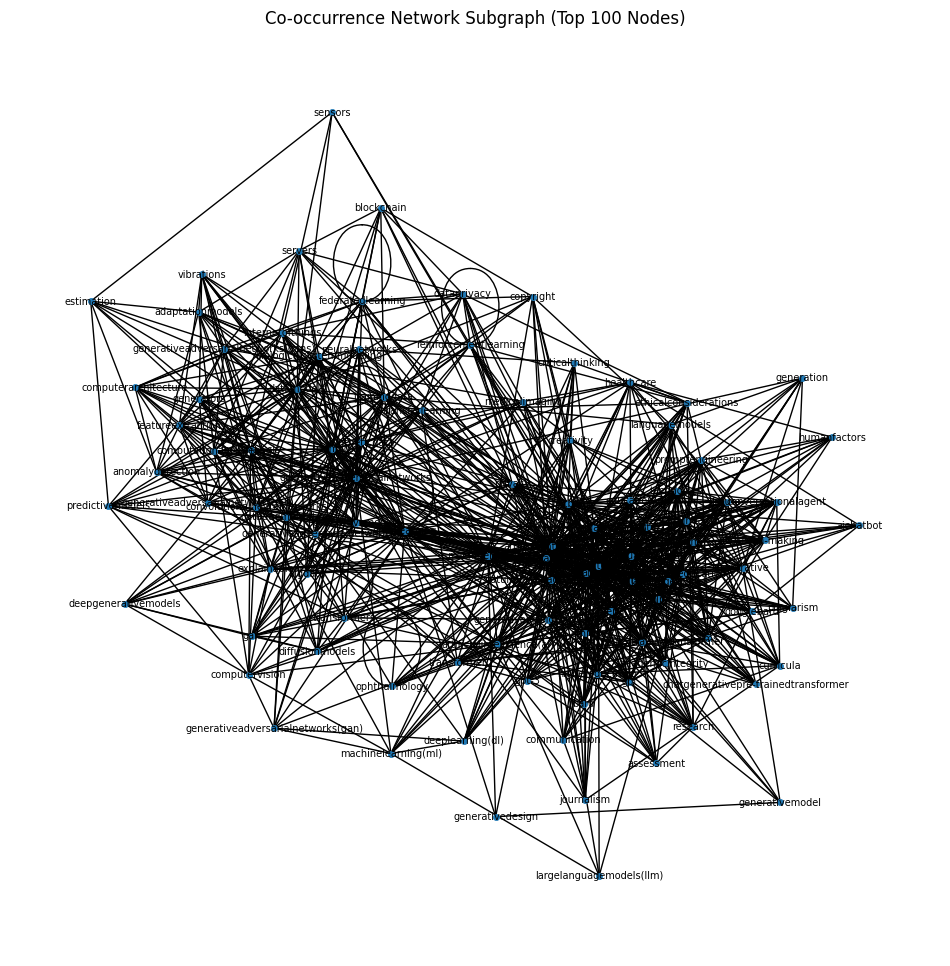

In [ ]:
import matplotlib.pyplot as plt

sub_node = sorted(Network_Graph.degree, key=lambda x: x[1], reverse=True)[:100]
subgraph = Network_Graph.subgraph([node[0] for node in sub_node])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw_networkx(subgraph, pos, node_size=20, with_labels=True, font_size=7, edge_color="black", linewidths=0.5)
plt.title("Co-occurrence Network Subgraph (Top 100 Nodes)")
plt.axis('off')
plt.show()


### Adjacency Matrix


### The below code computes the adjacency matrix of the full graph {G}, transforms it into a more readable DataFrame, and shows only a subset of it (the top-left 10x10 section).

In [ ]:

adjacent_matrix = nx.adjacency_matrix(Network_Graph)

adjacent_matrix_df = pd.DataFrame(adjacent_matrix.todense(), index=Network_Graph.nodes(), columns=Network_Graph.nodes())

adjacent_matrix_df.iloc[:30, :30]


,legal,law,explainableai,blockchain,generativeai,responsibleai,aigovernance,airegulation,generativemodels,inspectability,...,application,generativeadversarialnetworks,harms,power,inequality,chatgpt,pedagogicalagents,socratictutors,simulations,legalregulation
legal,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
law,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
explainableai,1,1,0,1,2,1,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0
blockchain,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
generativeai,1,1,2,1,0,1,3,2,2,1,...,1,1,1,1,1,56,1,1,1,1
responsibleai,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aigovernance,0,0,0,0,3,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
airegulation,0,0,0,0,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
generativemodels,0,0,1,0,2,0,1,1,0,1,...,0,2,0,0,0,0,0,0,0,0
inspectability,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Based on the co-occurrence count of each keyword pair, the below code  analyzes a network graph to identifies the top keyword pairings. It presents the keyword pairings along with their corresponding co-occurrence counts in a table manner. Before displaying the final result, the algorithm confirms data integrity by filtering out any entries in the 'Keyword' column that have null values.

In [ ]:
key_co_occur_count = nx.to_pandas_adjacency(Network_Graph).sum().sort_values(ascending=False)

top_keyword = key_co_occur_count.head(15)
top_keyword = top_keyword.reset_index()
top_keyword.columns = ['Keyword', 'Co-occurrence Count']
top_keyword

top_keyword = top_keyword[top_keyword['Keyword'].notna()]
top_keyword

,Keyword,Co-occurrence Count
1,artificialintelligence,1552.0
2,chatgpt,1360.0
3,generativeai,767.0
4,generativeadversarialnetworks,480.0
5,deeplearning,452.0
6,machinelearning,417.0
7,ai,401.0
8,largelanguagemodels,299.0
9,generativeartificialintelligence,263.0
10,naturallanguageprocessing,225.0


# Insights

### 1. The phrases "generative AI" and "artificial intelligence" draw attention to key areas of study in generative AI.
###2. Terms like "deep learning," "ChatGPT," and "machine learning" refer to particular models and methods which are employed in the industry.
###3. Terms like "generative artificial intelligence" and "large language models" point to particular applications or subfields within generative AI.
###4. The term "AI" is applicable to a wide range of fields.
###5. Less popular terms like "large language models" could point to new trends or specializations.
###6. Looking into less common terminology may lead to new areas of inquiry and analysis.


